# DC Property Analysis by Trenisha Goslee

### data from https://www.kaggle.com/christophercorrea/dc-residential-properties
### Below you will find a comparison of prices of residental properties in DC and their location (ward)

In [71]:
#Load libraries for data analysis
import pandas as pd
import numpy as np
#Load libraries for plotting and graphs
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [52]:
#Load csv file 
dc = pd.read_csv("DC_Properties.csv")
pd.options.display.float_format = '{:.2f}'.format

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.



In [53]:
#get file information
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          158957 non-null  int64  
 1   BATHRM              158957 non-null  int64  
 2   HF_BATHRM           158957 non-null  int64  
 3   HEAT                158957 non-null  object 
 4   AC                  158957 non-null  object 
 5   NUM_UNITS           106696 non-null  float64
 6   ROOMS               158957 non-null  int64  
 7   BEDRM               158957 non-null  int64  
 8   AYB                 158686 non-null  float64
 9   YR_RMDL             80928 non-null   float64
 10  EYB                 158957 non-null  int64  
 11  STORIES             106652 non-null  float64
 12  SALEDATE            132187 non-null  object 
 13  PRICE               98216 non-null   float64
 14  QUALIFIED           158957 non-null  object 
 15  SALE_NUM            158957 non-nul

In [54]:
#look at top rows
dc.head(10)

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.00,8,4,1910.00,1988.00,...,-77.04,Old City 2,040 D Old City 2,4201.00,004201 2006,Ward 2,152,-77.04,38.91,NW
1,1,3,1,Warm Cool,Y,2.00,11,5,1898.00,2007.00,...,-77.04,Old City 2,040 D Old City 2,4201.00,004201 2006,Ward 2,152,-77.04,38.91,NW
2,2,3,1,Hot Water Rad,Y,2.00,9,5,1910.00,2009.00,...,-77.04,Old City 2,040 D Old City 2,4201.00,004201 2006,Ward 2,152,-77.04,38.91,NW
3,3,3,1,Hot Water Rad,Y,2.00,8,5,1900.00,2003.00,...,-77.04,Old City 2,040 D Old City 2,4201.00,004201 2006,Ward 2,152,-77.04,38.91,NW
4,4,2,1,Warm Cool,Y,1.00,11,3,1913.00,2012.00,...,-77.04,Old City 2,040 D Old City 2,4201.00,004201 2006,Ward 2,152,-77.04,38.91,NW
5,5,3,2,Hot Water Rad,Y,1.00,10,5,1913.00,nan,...,-77.04,Old City 2,040 D Old City 2,4201.00,004201 2006,Ward 2,152,-77.04,38.91,NW
6,6,1,0,Warm Cool,Y,2.00,5,2,1917.00,1988.00,...,-77.04,Old City 2,040 D Old City 2,4201.00,004201 2005,Ward 2,152,-77.04,38.91,NW
7,7,3,1,Hot Water Rad,Y,2.00,8,4,1906.00,2011.00,...,-77.04,Old City 2,040 D Old City 2,4201.00,004201 2005,Ward 2,152,-77.04,38.91,NW
8,8,3,1,Warm Cool,Y,2.00,7,3,1908.00,2008.00,...,-77.04,Old City 2,040 D Old City 2,4201.00,004201 2005,Ward 2,152,-77.04,38.91,NW
9,9,1,1,Hot Water Rad,Y,1.00,6,2,1908.00,1979.00,...,-77.04,Old City 2,040 D Old City 2,4201.00,004201 2005,Ward 2,152,-77.04,38.91,NW


In [55]:
#get rid of columns I don't need
dc.drop(['Unnamed: 0','YR_RMDL','QUADRANT','SQUARE',
         'CENSUS_TRACT','CENSUS_BLOCK','ASSESSMENT_SUBNBHD',
         'NATIONALGRID','ZIPCODE','CITY','STATE','CMPLX_NUM',
         'GIS_LAST_MOD_DTTM','AYB','QUALIFIED','BLDG_NUM',
         'GRADE','USECODE','FULLADDRESS','LIVING_GBA'],axis=1, inplace=True)

In [56]:
#check to make sure the columns left are the ones I want
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BATHRM           158957 non-null  int64  
 1   HF_BATHRM        158957 non-null  int64  
 2   HEAT             158957 non-null  object 
 3   AC               158957 non-null  object 
 4   NUM_UNITS        106696 non-null  float64
 5   ROOMS            158957 non-null  int64  
 6   BEDRM            158957 non-null  int64  
 7   EYB              158957 non-null  int64  
 8   STORIES          106652 non-null  float64
 9   SALEDATE         132187 non-null  object 
 10  PRICE            98216 non-null   float64
 11  SALE_NUM         158957 non-null  int64  
 12  GBA              106696 non-null  float64
 13  STYLE            106696 non-null  object 
 14  STRUCT           106696 non-null  object 
 15  CNDTN            106696 non-null  object 
 16  EXTWALL          106696 non-null  obje

In [57]:
#divide information into two different arrays. One for numerical data and one for catergorical data
numerical = ['BATHRM', 'HF_BATHRM','ROOMS', 'BEDRM' , 'STORIES' ,
             'PRICE','SALE_NUM','KITCHENS','LATITUDE', 'LONGITUDE','X', 'Y' ]
categorical = ['HEAT'  ,  'AC' ,  'SALEDATE' , 'STYLE', 'STRUCT' , 'CNDTN' , 'EXTWALL', 'ROOF', 'INTWALL' 
               , 'SOURCE' , 'ASSESSMENT_NBHD', 'WARD']
dc = dc[numerical + categorical]
#returns a tuple that tells me how many rows and columns I have
dc.shape        

(158957, 24)

In [58]:
#find the nun values and replace them with 0.
#change PRICE from float to integers 
#round the price values up 
dc = dc.fillna(0)
dc.loc[:, (dc != 0).any(axis=0)]
dc["PRICE"] = dc["PRICE"].fillna(0)
dc["PRICE"] = dc["PRICE"].astype(int)
dc['PRICE'] = dc.PRICE.apply(np.ceil)

In [59]:
#I want to delete any house that is equal to 0 or less than 500,000
#the median price value of homes in DC are 566,000
zeroprice= dc[ (dc["PRICE"] == 0) | (dc['PRICE'] <=500000) ].index
 
# Delete these row indexes from dataFrame
dc.drop(zeroprice , inplace=True)

In [60]:
#check information after making changes 
dc.head(10)

,BATHRM,HF_BATHRM,ROOMS,BEDRM,STORIES,PRICE,SALE_NUM,KITCHENS,LATITUDE,LONGITUDE,...,SALEDATE,STYLE,STRUCT,CNDTN,EXTWALL,ROOF,INTWALL,SOURCE,ASSESSMENT_NBHD,WARD
0,4,0,8,4,3.00,1095000.00,1,2.00,38.91,-77.04,...,2003-11-25 00:00:00,3 Story,Row Inside,Good,Common Brick,Metal- Sms,Hardwood,Residential,Old City 2,Ward 2
2,3,1,9,5,3.00,2100000.00,3,2.00,38.91,-77.04,...,2016-06-21 00:00:00,3 Story,Row Inside,Very Good,Common Brick,Built Up,Hardwood,Residential,Old City 2,Ward 2
3,3,1,8,5,3.00,1602000.00,1,2.00,38.91,-77.04,...,2006-07-12 00:00:00,3 Story,Row Inside,Good,Common Brick,Built Up,Hardwood,Residential,Old City 2,Ward 2
5,3,2,10,5,4.00,1950000.00,1,1.00,38.91,-77.04,...,2010-02-26 00:00:00,4 Story,Row Inside,Good,Common Brick,Built Up,Hardwood,Residential,Old City 2,Ward 2
7,3,1,8,4,3.00,1050000.00,1,2.00,38.92,-77.04,...,2011-09-29 00:00:00,3 Story,Row Inside,Average,Common Brick,Metal- Sms,Hardwood,Residential,Old City 2,Ward 2
8,3,1,7,3,2.00,1430000.00,4,2.00,38.92,-77.04,...,2018-05-03 00:00:00,2 Story,Row Inside,Very Good,Common Brick,Built Up,Hardwood,Residential,Old City 2,Ward 2
14,3,1,5,3,2.00,1325000.00,1,2.00,38.92,-77.04,...,2011-09-30 00:00:00,2 Story,Row Inside,Very Good,Stucco,Metal- Sms,Hardwood,Residential,Old City 2,Ward 2
16,3,1,8,3,2.00,1240000.00,1,1.00,38.92,-77.04,...,2010-11-04 00:00:00,2 Story,Row Inside,Very Good,Common Brick,Metal- Sms,Hardwood,Residential,Old City 2,Ward 2
19,3,1,9,3,2.00,592250.00,1,2.00,38.92,-77.04,...,2001-07-23 00:00:00,2 Story,Row Inside,Good,Common Brick,Built Up,Hardwood,Residential,Old City 2,Ward 2
22,1,0,6,3,2.00,907400.00,1,1.00,38.91,-77.03,...,2006-01-09 00:00:00,2 Story,Semi-Detached,Good,Common Brick,Built Up,Hardwood,Residential,Old City 2,Ward 2


In [61]:
#Get information on prices
#This shows me that the average price for a dc property is $2007947.86. 
dc["PRICE"].describe()

count       37168.00
mean      2007947.86
std      11396154.08
min        500058.00
25%        610000.00
50%        749950.00
75%        987500.00
max     137427545.00
Name: PRICE, dtype: float64

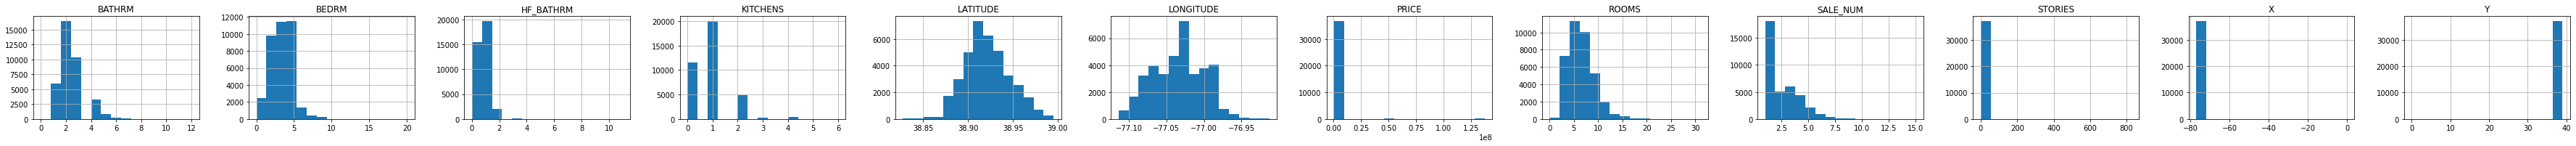

In [62]:
#created a histogram for each column in the numerical dataset
#longitude and latitude show where the most concentrated houses are
#the histograms also show how many bedrooms,bathrooms, etc each house has
dc[numerical].hist(bins=15, figsize=(100, 50), layout=(15, 19));

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



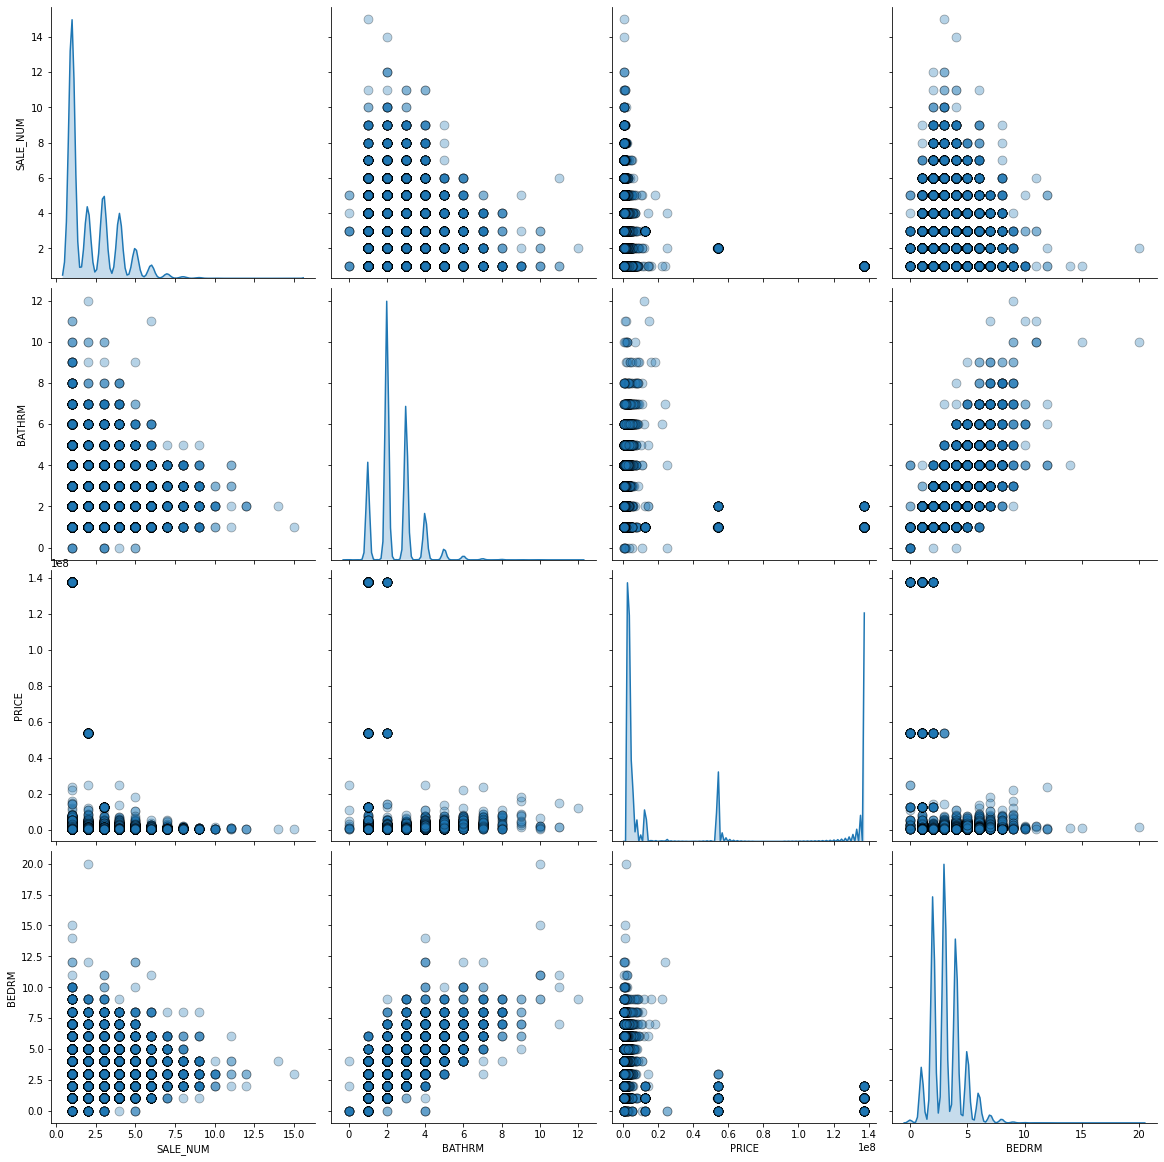

In [63]:
#creating pair plots to visulize relatioships between different variables 
#for example seeing the SALE_NUM and the number of bedrooms in the house

sns.pairplot(dc[['SALE_NUM','BATHRM','PRICE','BEDRM']], kind="scatter", diag_kind = 'kde', plot_kws = {'alpha': 0.33, 's': 80, 'edgecolor': 'k'}, size = 4)
plt.show()

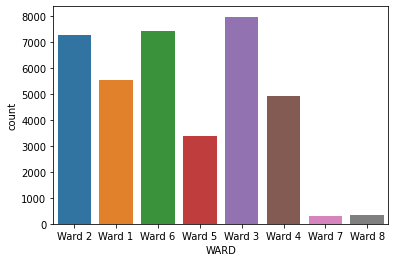

In [64]:
#a countplot can be used to the number of residential properties located in each ward (based on houses being over
#$500,000)
sns.countplot(dc['WARD']);

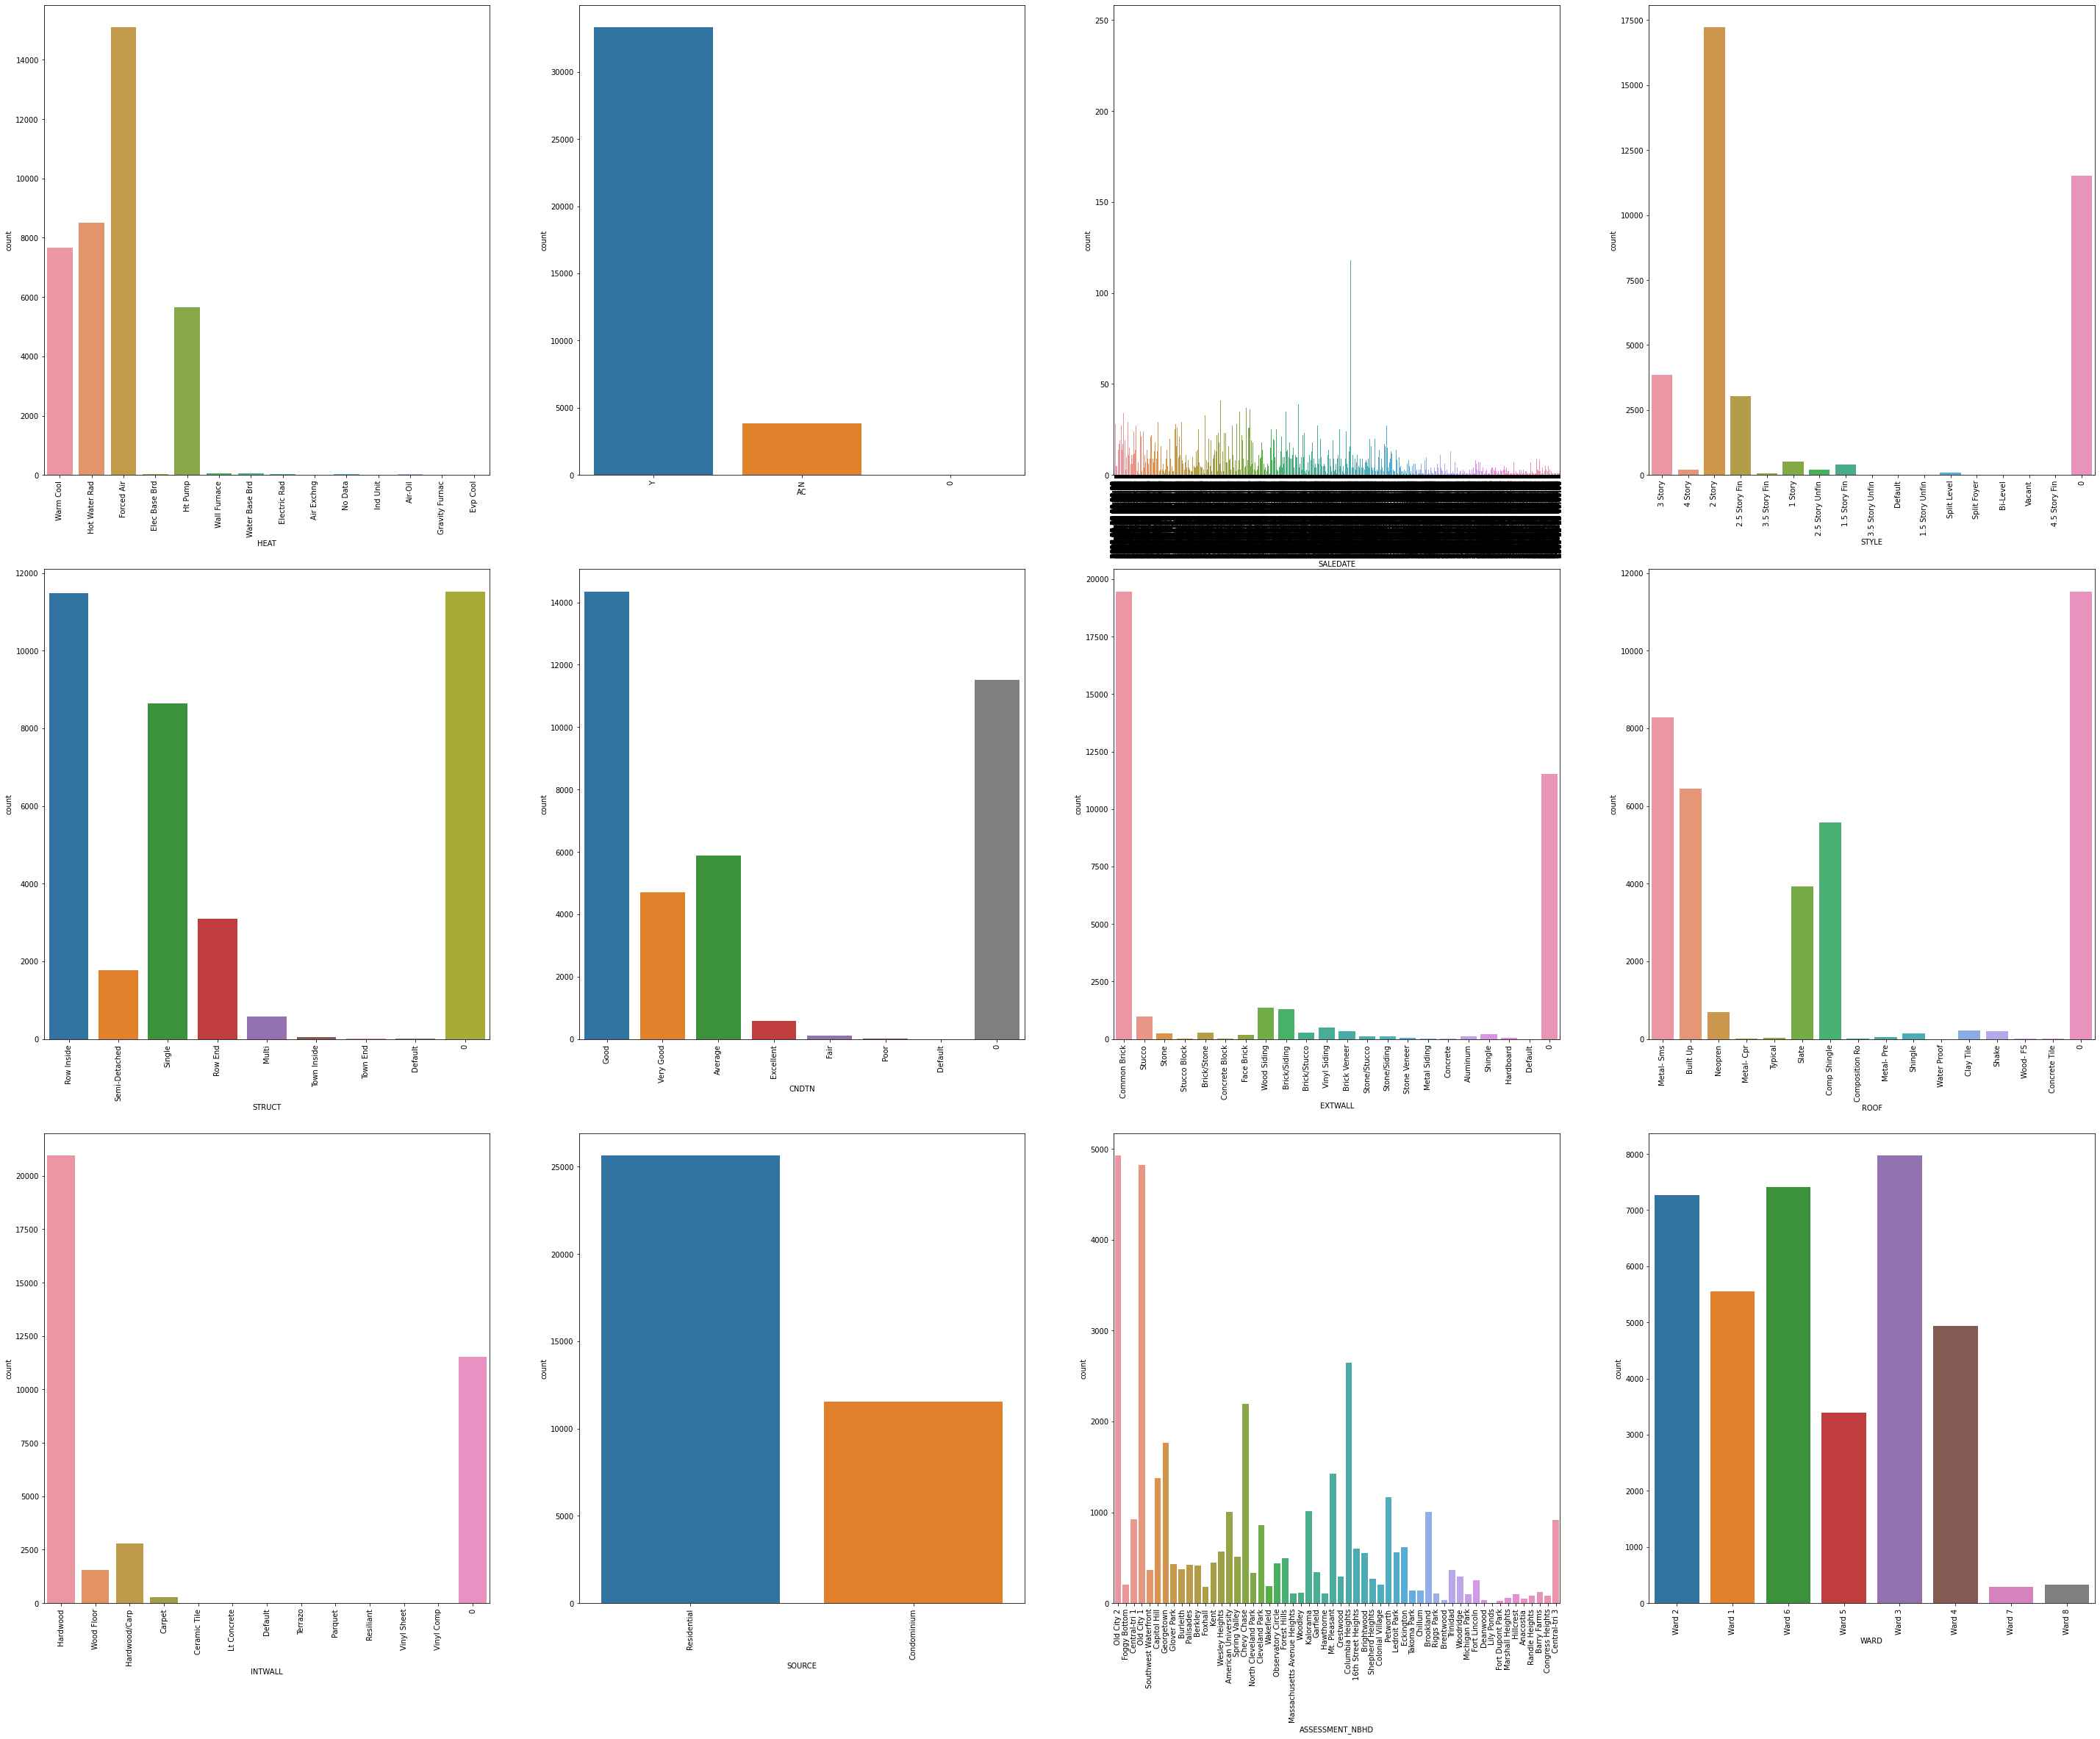

In [65]:
#I made a countplot for each categorical column in my dataset
#THis helps me get a closer look at each category and it plays a role in the DC housing market 
fig, ax = plt.subplots(3, 4, figsize=(50, 40))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(dc[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

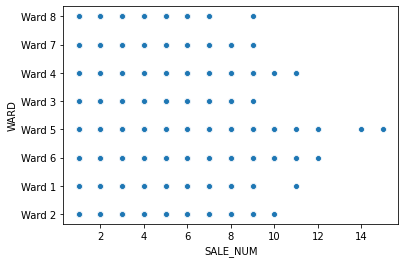

In [66]:
#I created a scatterplot to show the comparison of the number of times a house has been sold to the ward it is located in
sns.scatterplot(x=dc['SALE_NUM'], y=dc['WARD']);

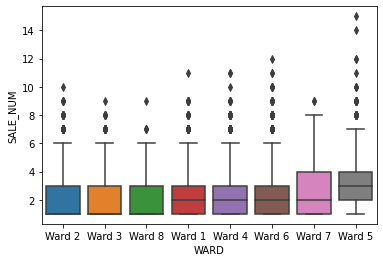

In [70]:
#I took a look at the average times a house is sold (grouped by ward) using a bloxplot
dc_closelook = dc.groupby(['WARD'])['SALE_NUM'].median().sort_values()
sns.boxplot(x=dc['WARD'], y=dc['SALE_NUM'], order=list(dc_closelook.index))

I created a scatter plot that shows the location of the properties using longitude and latitude. 
when the plots are hovered over you can see which ward they are located in. 
Based on the scatter plot you can see that ward 7 and 8 have the least amount of properties over the average price of 
$566,000. 

In [69]:
#import plotly.express as px
#px.scatter(dc, x="LONGITUDE", y="LATITUDE", hover_data=['WARD'])